# NOTE:- This is only a reference file. you do not need to copy this file exactly you can analyze your data in your own way

# 1. Introduction

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

 # 2. Retrieving the Data

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/application_test.csv"
appt = pd.read_csv(path)

FileNotFoundError: ignored

In [ ]:
appt

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
path = "/content/drive/MyDrive/application_train.csv"
train = pd.read_csv(path)
train
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
path = "/content/drive/MyDrive/bureau.csv"
burc = pd.read_csv(path)
burc

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [ ]:
path = "/content/drive/MyDrive/bureau_balance.csv"
burb = pd.read_csv(path)
burb

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [ ]:
path = "/content/drive/MyDrive/credit_card_balance.csv"
cc = pd.read_csv(path)
cc

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [ ]:
path = "/content/drive/MyDrive/installments_payments.csv"
ii = pd.read_csv(path)
ii


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1,6,-1180,-1187,6948.360,6948.360
1,1330831,151639,0,34,-2156,-2156,1716.525,1716.525
2,2085231,193053,2,1,-63,-63,25425.000,25425.000
3,2452527,199697,1,3,-2418,-2426,24350.130,24350.130
4,2714724,167756,1,2,-1383,-1366,2165.040,2160.585
...,...,...,...,...,...,...,...,...
1048570,1515282,138318,1,3,-2358,-2369,9546.300,1264.950
1048571,1760779,143076,1,18,-1974,-1979,29263.680,29263.680
1048572,2127084,152628,1,1,-2552,-2561,4647.600,4647.600
1048573,1234954,170831,0,16,-596,-596,1465.560,1465.560


In [ ]:
path = "/content/drive/MyDrive/POS_CASH_balance.csv"
pos = pd.read_csv(path)
pos

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [ ]:
path = "/content/drive/MyDrive/previous_application.csv"
pa = pd.read_csv(path)
pa

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [ ]:
train.size

37516342

In [ ]:
# size of POS_CASH_BALANCE
pos.size

80010864

In [ ]:
#size of bureau_balance
burb.size

81899775

In [ ]:
#size of bureau
burc.size

29179276

In [ ]:
#size of credit_card_balance
cc.size

88327176

In [ ]:
#size of installments_payments
ii.size

2367488

In [ ]:
#size of previous_application
pa.size

61797918

# 3. Check  Data

Application_train data

In [ ]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [ ]:
train.shape

(307511, 122)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


**POS_CASH_balance data**

In [ ]:
pos.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [ ]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
pos.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,10001358,1.000136e+07,1.000136e+07
unique,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,9151119,NaN,NaN
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,NaN,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,NaN,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,NaN,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,NaN,0.000000e+00,0.000000e+00


In [ ]:
pos.shape

(10001358, 8)

**bureau_balance data**

In [ ]:
burb.dtypes

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [ ]:
burb.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
burb.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [ ]:
burb.shape

(27299925, 3)

**previous_application data**

In [ ]:
pa.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [ ]:
pa.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [ ]:
pa.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,...,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,...,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,...,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,...,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,...,NaN,1.456729e+01,NaN,NaN,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,...,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,...,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,...,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,...,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


**installments_payments data**

In [ ]:
ii.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [ ]:
ii.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
ii.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


**credit_card_balance data**

In [ ]:
cc.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

In [ ]:
cc.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3840312,3.840312e+06,3.840312e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3698436,NaN,NaN
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,NaN,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,NaN,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,NaN,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,NaN,0.000000e+00,0.000000e+00


In [ ]:
cc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


**bureau data**

In [ ]:
burc.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [ ]:
burc.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [ ]:
burc.tail(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1716418,433007,5057708,Closed,currency 1,-1389,0,-1299.0,-1299.0,0.0,0,334158.435,0.0,0.0,0.0,Consumer credit,-1299,NaN
1716419,352790,5057718,Closed,currency 1,-1808,0,-1596.0,-1625.0,8100.0,0,28248.840,0.0,0.0,0.0,Consumer credit,-1625,NaN
1716420,352790,5057725,Closed,currency 1,-99,0,-83.0,-98.0,NaN,0,27000.000,0.0,0.0,0.0,Consumer credit,-18,NaN
1716421,375755,5057734,Closed,currency 1,-1335,0,-1152.0,-1152.0,NaN,0,195408.000,0.0,NaN,0.0,Consumer credit,-1139,NaN
1716422,375755,5057742,Closed,currency 1,-2648,0,31129.0,-189.0,NaN,0,202500.000,0.0,NaN,0.0,Credit card,-109,NaN
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.000,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.840,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.000,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.000,0.0,0.0,0.0,Consumer credit,-1508,NaN
1716427,246829,5057778,Closed,currency 1,-463,0,NaN,-387.0,NaN,0,22500.000,0.0,NaN,0.0,Microloan,-387,NaN


#  4 Check for missing data

**checking missing data in application_train **

In [ ]:
train.isnull()
# is null shows the entire dataset with true or false value... true shows the values which as null values and false shows the values which as not null values.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isnull().sum()
# this code is use to count the null values

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
train[train['AMT_REQ_CREDIT_BUREAU_DAY'].isnull()]
# this code shows only those cells which has null values.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307484,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.isna().sum()
train.isnull().mean().sort_values(ascending=false).head(50)

NameError: ignored

**checking missing data in POS_CASH_balance **

In [ ]:
# checking missing data
pos.isnull()


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
10001353,False,False,False,False,False,False,False,False
10001354,False,False,False,False,False,False,False,False
10001355,False,False,False,False,False,False,False,False
10001356,False,False,False,False,False,False,False,False


In [ ]:
pos.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [ ]:
pos[pos['CNT_INSTALMENT'].isnull()]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
709,1889585,403422,-6,NaN,NaN,Signed,0,0
759,1618886,382448,-2,NaN,NaN,Signed,0,0
1887,2288203,429576,-6,NaN,NaN,Signed,0,0
1899,2110224,167171,-6,NaN,NaN,Signed,0,0
1910,2031967,235187,-5,NaN,NaN,Signed,0,0
...,...,...,...,...,...,...,...,...
9998668,1770932,441177,-10,NaN,NaN,Signed,0,0
9998696,1770932,441177,-11,NaN,NaN,Signed,0,0
9999114,1770932,441177,-8,NaN,NaN,Signed,0,0
9999116,1770932,441177,-9,NaN,NaN,Signed,0,0


**checking missing data in bureau_balance **

In [ ]:
# checking missing data
burb.isnull()


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
27299920,False,False,False
27299921,False,False,False
27299922,False,False,False
27299923,False,False,False


In [ ]:
burb.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

**checking missing data in previous_application **

In [ ]:
# checking missing data
pa.isnull()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670211,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670212,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
pa.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
pa[pa['AMT_ANNUITY'].isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670187,1971628,435554,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,10,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1670190,2381880,175920,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1670193,1120445,179433,Revolving loans,NaN,0.0,0.0,NaN,NaN,SUNDAY,13,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1670196,1662123,398290,Consumer loans,NaN,57910.5,57910.5,0.0,57910.5,SATURDAY,9,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN


**checking missing data in installments_payments **

In [ ]:
# checking missing data
ii.isnull()


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
13605396,False,False,False,False,False,True,False,True
13605397,False,False,False,False,False,True,False,True
13605398,False,False,False,False,False,True,False,True
13605399,False,False,False,False,False,True,False,True


In [ ]:
ii.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [ ]:
ii[ii['DAYS_ENTRY_PAYMENT'].isnull()]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3764207,1531600,103793,1.0,7,-668.0,NaN,49741.020,NaN
3764208,1947105,159974,1.0,24,-36.0,NaN,22849.515,NaN
3764209,1843773,167270,1.0,22,-20.0,NaN,48092.355,NaN
3764210,1691592,192536,1.0,5,-2561.0,NaN,7675.425,NaN
3764211,1531299,157088,0.0,11,-1847.0,NaN,67.500,NaN
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


**checking missing data in credit_card_balance **

In [ ]:
cc.isnull()


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,False,False,False,False,False,True,False,True,True,False,...,False,False,True,False,True,True,False,False,False,False
3840308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3840309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3840310,False,False,False,False,False,True,False,True,True,False,...,False,False,True,False,True,True,False,False,False,False


In [ ]:
cc.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [ ]:
cc[cc['CNT_DRAWINGS_POS_CURRENT'].isnull()]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45,2657726,399970,-5,0.0,225000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
47,1517613,121258,-6,0.0,135000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
49,2408643,104761,-4,0.0,225000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
52,1322825,215709,-5,0.0,180000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
60,1217908,162464,-5,0.0,45000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840272,2463643,315621,-15,0.0,0,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3840303,1307188,385981,-9,0.0,0,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3840306,1410474,255737,-13,0.0,180000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3840307,1036507,328243,-9,0.0,45000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


**checking missing data in bureau **

In [ ]:
# checking missing data
burc.isnull()


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,True
3,False,False,False,False,False,False,True,True,True,False,False,True,True,False,False,False,True
4,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1716424,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1716425,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,True
1716426,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [ ]:
burc.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
burc[burc['DAYS_CREDIT_ENDDATE'].isnull()]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
17,238881,5714486,Active,currency 1,-381,0,NaN,NaN,NaN,0,450000.0,520920.00,NaN,0.0,Consumer credit,-4,NaN
20,238881,5714489,Active,currency 1,-392,0,NaN,NaN,0.0,0,252000.0,23679.00,228320.10,0.0,Credit card,-22,NaN
32,136226,5714503,Closed,currency 1,-559,0,NaN,-355.0,0.0,0,110250.0,0.00,0.00,0.0,Credit card,-351,NaN
43,435112,5714518,Active,currency 1,-1483,0,NaN,NaN,NaN,0,200250.0,0.00,NaN,0.0,Credit card,-848,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716324,104893,5055269,Active,currency 1,-51,0,NaN,NaN,0.0,0,103500.0,92882.25,10617.75,0.0,Credit card,-13,NaN
1716351,169747,5055520,Active,currency 1,-307,0,NaN,NaN,0.0,0,112500.0,0.00,112500.00,0.0,Credit card,-24,NaN
1716384,195589,5057408,Active,currency 1,-195,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-5,NaN
1716396,181001,5057529,Closed,currency 1,-339,0,NaN,-163.0,NaN,0,1057500.0,NaN,NaN,0.0,Consumer credit,-163,NaN


# 5. Data Exploration

In [ ]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Distribution of AMT_CREDIT

In [ ]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
train[["AMT_CREDIT","OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").agg(["count","sum"])

AMT_CREDIT              
                           count           sum
OCCUPATION_TYPE                               
Accountants                 9813  6.964849e+09
Cleaning staff              4653  2.377501e+09
Cooking staff               5946  3.205930e+09
Core staff                 27570  1.723740e+10
Drivers                    18603  1.139125e+10
HR staff                     563  3.856456e+08
High skill tech staff      11380  7.316336e+09
IT staff                     526  3.406364e+08
Laborers                   55186  3.149012e+10
Low-skill Laborers          2093  9.595668e+08
Managers                   21371  1.656447e+10
Medicine staff              8537  5.185636e+09
Private service staff       2652  1.672522e+09
Realty agents                751  4.921120e+08
Sales staff                32102  1.808172e+10
Secretaries                 1305  7.745441e+08
Security staff              6721  3.744137e+09
Waiters/barmen staff        1348  6.624773e+08

In [ ]:
train["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

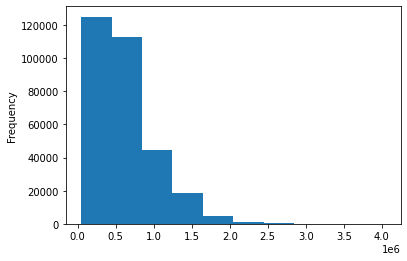

In [ ]:
train["AMT_CREDIT"].plot(kind="hist")

##  Distribution of AMT_INCOME_TOTAL

In [ ]:
train[["AMT_INCOME_TOTAL","NAME_INCOME_TYPE"]].groupby("NAME_INCOME_TYPE").agg(["count","sum"])

AMT_INCOME_TOTAL              
                                count           sum
NAME_INCOME_TYPE                                   
Businessman                        10  6.525000e+06
Commercial associate            71617  1.453505e+10
Maternity leave                     5  7.020000e+05
Pensioner                       55362  7.551448e+09
State servant                   21703  3.900853e+09
Student                            18  3.069000e+06
Unemployed                         22  2.431800e+06
Working                        158774  2.590714e+10

In [ ]:
train["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

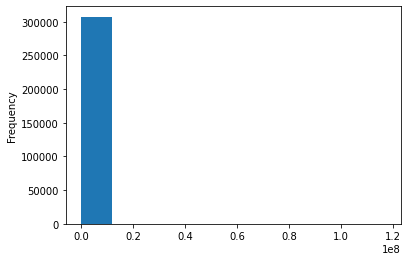

In [ ]:
train["AMT_INCOME_TOTAL"].plot(kind="hist")

##  Distribution of AMT_GOODS_PRICE

In [ ]:
train[["AMT_GOODS_PRICE","OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").agg(["count","sum"])

AMT_GOODS_PRICE              
                                count           sum
OCCUPATION_TYPE                                    
Accountants                      9802  6.357930e+09
Cleaning staff                   4648  2.089274e+09
Cooking staff                    5940  2.830421e+09
Core staff                      27531  1.555781e+10
Drivers                         18590  1.018381e+10
HR staff                          563  3.498795e+08
High skill tech staff           11371  6.615468e+09
IT staff                          525  3.117922e+08
Laborers                        55134  2.799532e+10
Low-skill Laborers               2092  8.338014e+08
Managers                        21348  1.515761e+10
Medicine staff                   8528  4.610837e+09
Private service staff            2648  1.499795e+09
Realty agents                     751  4.410116e+08
Sales staff                     32064  1.617706e+10
Secretaries                      1305  6.966357e+08
Security staff                   6713  3.311364e+09
Waiters/barmen staff             1346  5.907705e+08

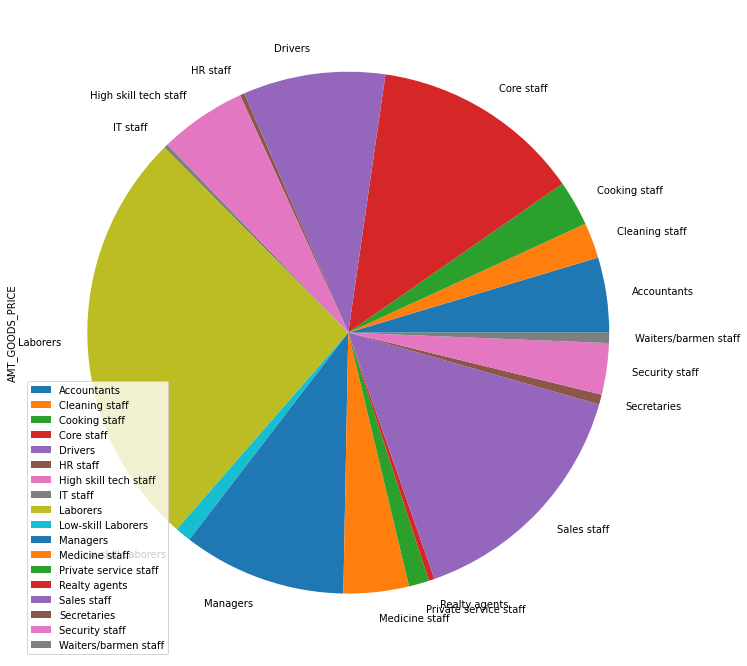

In [ ]:
train[["AMT_GOODS_PRICE","OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").agg('count').plot(kind="pie",y="AMT_GOODS_PRICE",figsize=(12,12))

##  Who accompanied client when applying for the  application

In [ ]:
#code
pa['NAME_TYPE_SUITE']

0                      NaN
1            Unaccompanied
2          Spouse, partner
3                      NaN
4                      NaN
                ...       
1670209                NaN
1670210      Unaccompanied
1670211    Spouse, partner
1670212             Family
1670213             Family
Name: NAME_TYPE_SUITE, Length: 1670214, dtype: object

##  Data is balanced or imbalanced

##  Types of loan

* **Rovolving loans :**  Arrangement which allows for the loan amount to be withdrawn, repaid, and redrawn again in any manner and any number of times, until the arrangement expires. Credit card loans and overdrafts are revolving loans Also called evergreen loan.
unique() function is used to find unique key. Here we used unique to find name_contract_type unique key.
Groupby() is used for grouping the data according to the categories and apply a function to the categories 

In [ ]:
train['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [ ]:
train[["AMT_CREDIT","NAME_CONTRACT_TYPE"]].groupby("NAME_CONTRACT_TYPE").agg(["count"])

,AMT_CREDIT
,count
NAME_CONTRACT_TYPE,
Cash loans,278232
Revolving loans,29279


In [ ]:
train["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

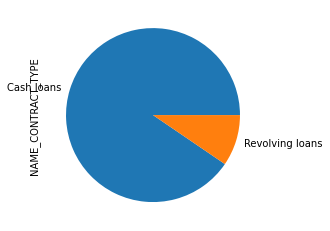

In [ ]:
train["NAME_CONTRACT_TYPE"].value_counts().plot.pie()

* Most of the loans are Cash loans which were taken by applicants. **90.5 %** loans are Cash loans.

## Purpose of loan

In [ ]:
pa['NAME_CASH_LOAN_PURPOSE'].unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [ ]:
pa[["AMT_CREDIT","NAME_CASH_LOAN_PURPOSE"]].groupby("NAME_CASH_LOAN_PURPOSE").agg(["count"])

,AMT_CREDIT
,count
NAME_CASH_LOAN_PURPOSE,
Building a house or an annex,2693
Business development,426
Buying a garage,136
Buying a holiday home / land,533
Buying a home,865
Buying a new car,1012
Buying a used car,2888
Car repairs,797


In [ ]:
pa["NAME_CASH_LOAN_PURPOSE"].value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

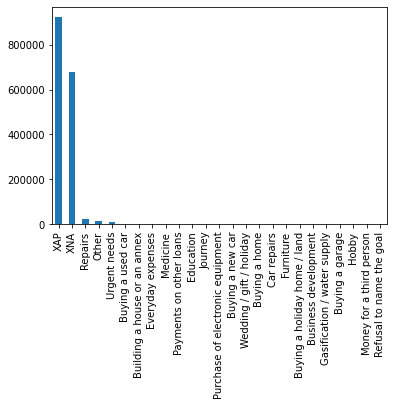

In [ ]:
pa["NAME_CASH_LOAN_PURPOSE"].value_counts().plot.bar()

##  Income sources of Applicant's who applied for loan

In [ ]:
#code
train[["AMT_CREDIT","NAME_INCOME_TYPE"]].groupby("NAME_INCOME_TYPE").agg(["count","sum"])

AMT_CREDIT              
                          count           sum
NAME_INCOME_TYPE                             
Businessman                  10  1.228500e+07
Commercial associate      71617  4.797717e+10
Maternity leave               5  3.748500e+06
Pensioner                 55362  3.003643e+10
State servant             21703  1.453709e+10
Student                      18  9.194175e+06
Unemployed                   22  1.681650e+07
Working                  158774  9.161435e+10

* 51.6 % Applicants mentioned that they are working.  23.3 % are Commercial Associate and 18 % are Pensioner etc. 

In [ ]:
train["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

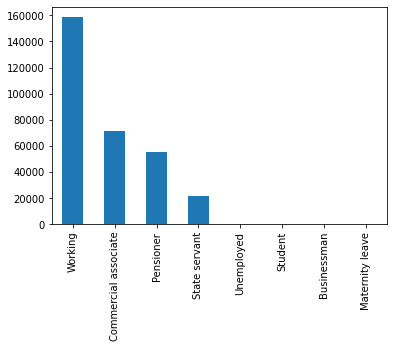

In [ ]:
train["NAME_INCOME_TYPE"].value_counts().plot.bar()

##  Family Status of Applicant's who applied for loan

In [ ]:
train["NAME_FAMILY_STATUS"].value_counts(dropna=False)

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
train["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

* 63.9 % applicants are married. 14.8 % are single etc.

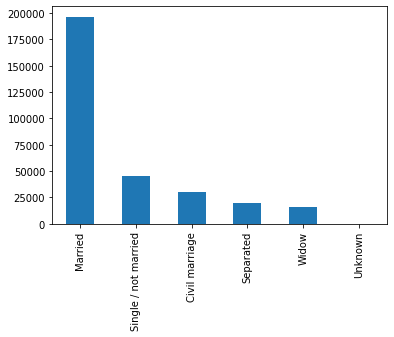

In [ ]:
train["NAME_FAMILY_STATUS"].value_counts().plot.bar()

##   Occupation of Applicant's who applied for loan

In [ ]:
#code
train[["AMT_CREDIT","OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").agg(["count"])

,AMT_CREDIT
,count
OCCUPATION_TYPE,
Accountants,9813
Cleaning staff,4653
Cooking staff,5946
Core staff,27570
Drivers,18603
HR staff,563
High skill tech staff,11380
IT staff,526


* **Top Applicant's who applied for loan :**
  * Laborers - Apprx. 55 K
  * Sales Staff - Approx. 32 K
  * Core staff - Approx. 28 K
  * Managers - Approx. 21 K
  * Drivers - Approx. 19 K

In [ ]:
train["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

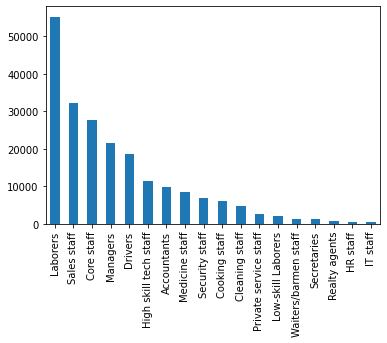

In [ ]:
train["OCCUPATION_TYPE"].value_counts().plot.bar()

##   Education of Applicant's who applied for loan

In [ ]:
#code
train[["AMT_CREDIT","NAME_EDUCATION_TYPE"]].groupby("NAME_EDUCATION_TYPE").agg(["count","sum"])

AMT_CREDIT              
                                   count           sum
NAME_EDUCATION_TYPE                                   
Academic degree                      164  1.186566e+08
Higher education                   74863  5.165176e+10
Incomplete higher                  10277  5.824290e+09
Lower secondary                     3816  1.868881e+09
Secondary / secondary special     218391  1.247435e+11

In [ ]:
train['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

* 71 % applicants have secondary and 24.3 % having higher education.

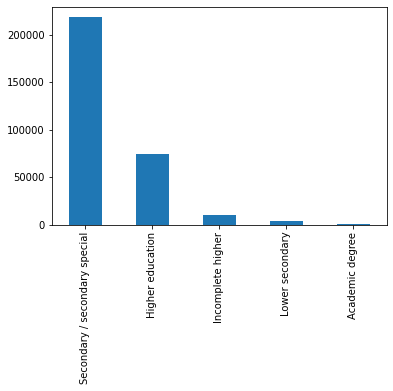

In [ ]:
train["NAME_EDUCATION_TYPE"].value_counts().plot.bar()

##  For which types of house higher applicant's applied for loan ?

In [ ]:
train[["AMT_CREDIT","FLAG_OWN_REALTY"]].groupby("FLAG_OWN_REALTY").agg(["count"])

,AMT_CREDIT
,count
FLAG_OWN_REALTY,
N,94199
Y,213312


* Approx. 89 % peoples applied for loan, they mentioned type of house is **House / Appartment**.

In [ ]:
train['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

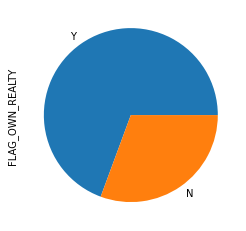

In [ ]:
train["FLAG_OWN_REALTY"].value_counts().plot.pie()

## Types of Organizations who applied for loan 

In [ ]:
#code
train[["AMT_CREDIT","ORGANIZATION_TYPE"]].groupby("ORGANIZATION_TYPE").agg(["count"])

,AMT_CREDIT
,count
ORGANIZATION_TYPE,
Advertising,429
Agriculture,2454
Bank,2507
Business Entity Type 1,5984
Business Entity Type 2,10553
Business Entity Type 3,67992
Cleaning,260
Construction,6721


In [ ]:
train["ORGANIZATION_TYPE"].value_counts(normalize=True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

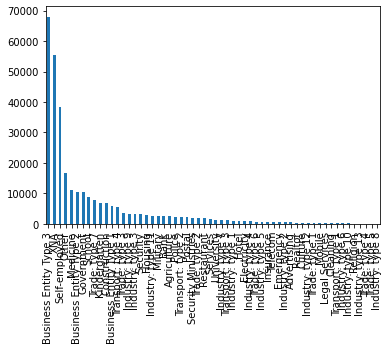

In [ ]:
train["ORGANIZATION_TYPE"].value_counts().plot.bar()

* **Types of Organizations who applied for loan :**
  * Business Entity Type 3 - Approx. 68 K
  * XNA - Approx. 55 K
  * Self employed - Approx. 38 K
  * Others - Approx. 17 K
  * Medicine - Approx. 11 K
 

##  Exploration in terms of loan is repayed or not

##  Income sources of Applicant's in terms of loan is repayed or not in %
## in this question we need to find income source of client on the basis of amount payment name income type available  

In [ ]:
a=pd.merge(train,ii,on="SK_ID_CURR",how='inner')
a


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818,1,16,-115,-133,9251.775,9251.775
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818,1,8,-355,-375,9251.775,9251.775
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818,2,19,-25,-49,53093.745,53093.745
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818,1,12,-235,-250,9251.775,9251.775
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,1038818,1,9,-325,-344,9251.775,9251.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892023,199993,0,Cash loans,F,N,N,1,90000.0,687600.0,18265.5,...,0.0,0.0,1.0,2567864,1,2,-755,-765,4874.715,4874.715
892024,199993,0,Cash loans,F,N,N,1,90000.0,687600.0,18265.5,...,0.0,0.0,1.0,2567864,1,17,-305,-335,4874.715,1054.890
892025,199993,0,Cash loans,F,N,N,1,90000.0,687600.0,18265.5,...,0.0,0.0,1.0,2567864,1,16,-335,-335,4874.715,4874.715
892026,199993,0,Cash loans,F,N,N,1,90000.0,687600.0,18265.5,...,0.0,0.0,1.0,2567864,1,8,-575,-575,4874.715,4874.715


In [ ]:
a[["AMT_PAYMENT","NAME_INCOME_TYPE"]].groupby("NAME_INCOME_TYPE").agg(["count"])

,AMT_PAYMENT
,count
NAME_INCOME_TYPE,
Commercial associate,208692
Pensioner,173036
State servant,63161
Student,22
Unemployed,117
Working,447000


In [ ]:
a["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

Working                 50.110535
Commercial associate    23.395230
Pensioner               19.398046
State servant            7.080607
Unemployed               0.013116
Student                  0.002466
Name: NAME_INCOME_TYPE, dtype: float64

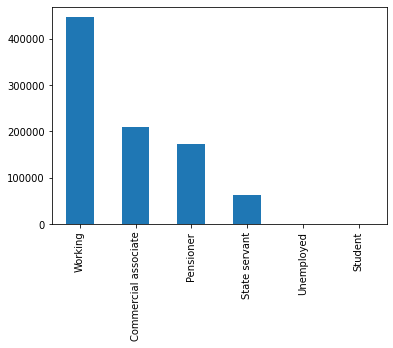

In [ ]:
a["NAME_INCOME_TYPE"].value_counts().plot.bar()

## Family Status of Applicant's in terms of loan is repayed or not in %

In [ ]:
a[["AMT_PAYMENT","NAME_FAMILY_STATUS"]].groupby("NAME_FAMILY_STATUS").agg(["count"])

,AMT_PAYMENT
,count
NAME_FAMILY_STATUS,
Civil marriage,86040
Married,589251
Separated,57338
Single / not married,106334
Widow,53065


In [ ]:
a["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100

Married                 66.057456
Single / not married    11.920478
Civil marriage           9.645437
Separated                6.427825
Widow                    5.948804
Name: NAME_FAMILY_STATUS, dtype: float64

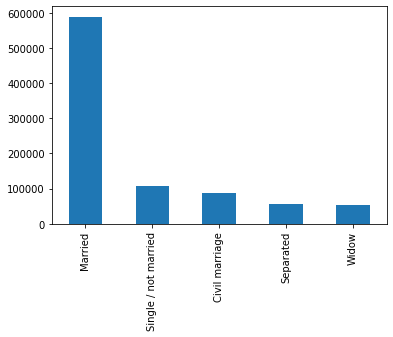

In [ ]:
a["NAME_FAMILY_STATUS"].value_counts().plot.bar()

##  Occupation of Applicant's in terms of loan is repayed or not in %

In [ ]:
#code
a[["AMT_PAYMENT","OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").agg(["count"])

,AMT_PAYMENT
,count
OCCUPATION_TYPE,
Accountants,28402
Cleaning staff,14956
Cooking staff,18221
Core staff,73653
Drivers,52222
HR staff,1561
High skill tech staff,30612
IT staff,1093


In [ ]:
a["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.663733
Sales staff              15.263888
Core staff               12.229740
Managers                  9.824739
Drivers                   8.671222
High skill tech staff     5.082981
Accountants               4.716021
Medicine staff            4.369650
Security staff            3.463707
Cooking staff             3.025513
Cleaning staff            2.483375
Private service staff     1.323050
Low-skill Laborers        0.928028
Secretaries               0.613704
Waiters/barmen staff      0.547120
Realty agents             0.352846
HR staff                  0.259197
IT staff                  0.181488
Name: OCCUPATION_TYPE, dtype: float64

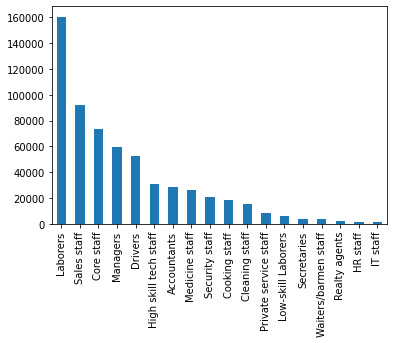

In [ ]:
a["OCCUPATION_TYPE"].value_counts().plot.bar()

##  Education of Applicant's in terms of loan is repayed or not in %

In [ ]:
#code
a[["AMT_PAYMENT","NAME_EDUCATION_TYPE"]].groupby("NAME_EDUCATION_TYPE").agg(["count"])

,AMT_PAYMENT
,count
NAME_EDUCATION_TYPE,
Academic degree,372
Higher education,191241
Incomplete higher,25256
Lower secondary,10688
Secondary / secondary special,664471


##  For which types of house higher applicant's applied for loan in terms of loan is repayed or not in %

In [ ]:
#code
a[["AMT_PAYMENT","FLAG_OWN_REALTY"]].groupby("FLAG_OWN_REALTY").agg(["count"])

,AMT_PAYMENT
,count
FLAG_OWN_REALTY,
N,259612
Y,632416


##  Types of Organizations in terms of loan is repayed or not in %

In [ ]:
#code
a[["AMT_PAYMENT","ORGANIZATION_TYPE"]].groupby("ORGANIZATION_TYPE").agg(["count"])

,AMT_PAYMENT
,count
ORGANIZATION_TYPE,
Advertising,1196
Agriculture,6500
Bank,6155
Business Entity Type 1,16225
Business Entity Type 2,29655
Business Entity Type 3,191772
Cleaning,658
Construction,18692


In [ ]:
a["ORGANIZATION_TYPE"].value_counts(normalize=True)*100

Business Entity Type 3    21.498428
XNA                       19.409256
Self-employed             12.410485
Other                      5.302412
Medicine                   3.766137
Government                 3.374782
Business Entity Type 2     3.324447
School                     3.118736
Trade: type 7              2.404969
Kindergarten               2.362146
Construction               2.095450
Business Entity Type 1     1.818889
Transport: type 4          1.697256
Security                   1.161959
Industry: type 3           1.127095
Industry: type 9           1.026761
Housing                    1.013309
Industry: type 11          0.948961
Trade: type 3              0.914882
Postal                     0.845153
Military                   0.833494
Agriculture                0.728677
Police                     0.712309
Bank                       0.690001
Transport: type 2          0.656482
Security Ministries        0.622626
Restaurant                 0.582269
Services                   0

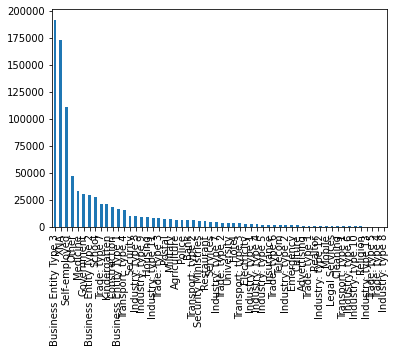

In [ ]:
a["ORGANIZATION_TYPE"].value_counts().plot.bar()

## Distribution of Name of type of the Suite in terms of loan is repayed or not in %

#  Exploartion of previous application data

## Contract product type of previous application

In [ ]:
#code
pa[["SK_ID_CURR","NAME_CONTRACT_TYPE"]].groupby("NAME_CONTRACT_TYPE").agg(["count"])

,SK_ID_CURR
,count
NAME_CONTRACT_TYPE,
Cash loans,747553
Consumer loans,729151
Revolving loans,193164
XNA,346


In [ ]:
pa['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

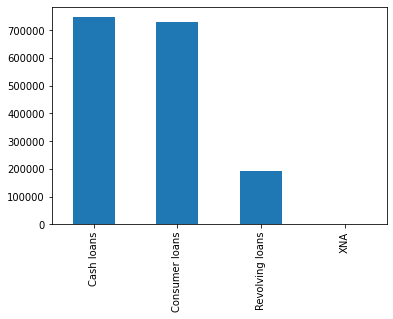

In [ ]:
pa["NAME_CONTRACT_TYPE"].value_counts().plot.bar()

* **Contract product type of previous application :**
  * Cash loans - 44.8 %
  * Consumer loans - 43.7 %
  * Rovolving loan - 11.6 %
  * XNA - 0.0207 %

##  On which day highest number of clients applied in prevoies application

In [ ]:
#code
pa[["SK_ID_CURR","WEEKDAY_APPR_PROCESS_START"]].groupby("WEEKDAY_APPR_PROCESS_START").agg(["count"])

,SK_ID_CURR
,count
WEEKDAY_APPR_PROCESS_START,
FRIDAY,252048
MONDAY,253557
SATURDAY,240631
SUNDAY,164751
THURSDAY,249099
TUESDAY,255118
WEDNESDAY,255010


In [ ]:
pa['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)*100

TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

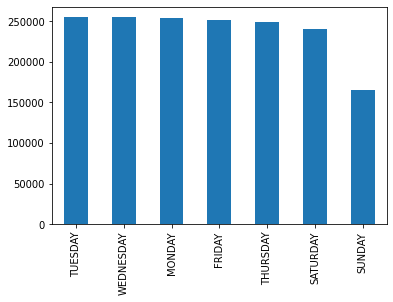

In [ ]:
pa["WEEKDAY_APPR_PROCESS_START"].value_counts().plot.bar()

* What a coincedence, Approximately 15 % clients applied in each 5 days a week i.e, Tuesday, Wednesday, Monday, Friday and Thrusday. 

##  Purpose of cash loan in previous application

In [ ]:
#code
pa[["SK_ID_CURR","NAME_CASH_LOAN_PURPOSE"]].groupby("NAME_CASH_LOAN_PURPOSE").agg(["count"])

,SK_ID_CURR
,count
NAME_CASH_LOAN_PURPOSE,
Building a house or an annex,2693
Business development,426
Buying a garage,136
Buying a holiday home / land,533
Buying a home,865
Buying a new car,1012
Buying a used car,2888
Car repairs,797


In [ ]:
pa['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

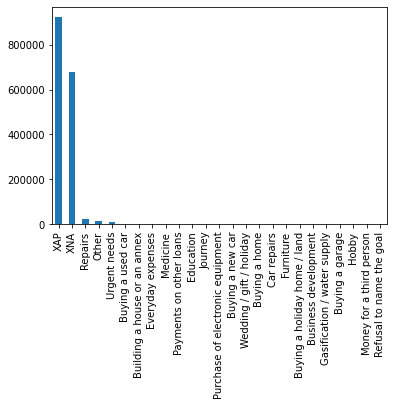

In [ ]:
pa["NAME_CASH_LOAN_PURPOSE"].value_counts().plot.bar()

* **Main purpose of the cash loan was  :**
  * XAP - 55 %
  * XNA - 41 %

##  Contract was approved or not in previous application

In [ ]:
#code
pa[["SK_ID_CURR","NAME_CONTRACT_STATUS"]].groupby("NAME_CONTRACT_STATUS").agg(["count"])

,SK_ID_CURR
,count
NAME_CONTRACT_STATUS,
Approved,1036781
Canceled,316319
Refused,290678
Unused offer,26436


In [ ]:
pa['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

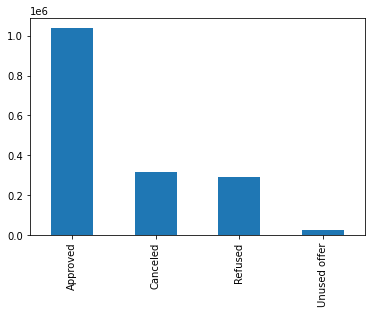

In [ ]:
pa["NAME_CONTRACT_STATUS"].value_counts().plot.bar()

* **Contract was approved or not in previous application :**
  * Approved : 62.1 % times
  * Cancelled : 18.9 % times
  * Refused : 17.4 % times 
  * Unused offer : 1.58 % times

##  Payment method that client choose to pay for the previous application

In [ ]:
#code
pa[["SK_ID_CURR","NAME_PAYMENT_TYPE"]].groupby("NAME_PAYMENT_TYPE").agg(["count"])

,SK_ID_CURR
,count
NAME_PAYMENT_TYPE,
Cash through the bank,1033552
Cashless from the account of the employer,1085
Non-cash from your account,8193
XNA,627384


In [ ]:
pa['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

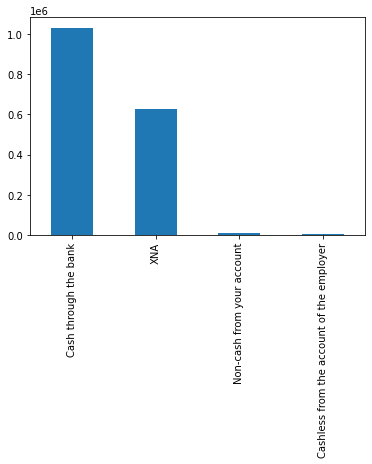

In [ ]:
pa["NAME_PAYMENT_TYPE"].value_counts().plot.bar()

* As we can most of the payment(61.9 %) has done thorugh cash only. 

##  Why was the previous application rejected ?

In [ ]:
#code
pa["CODE_REJECT_REASON"].value_counts(dropna=False)

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [ ]:
pa['CODE_REJECT_REASON'].value_counts(normalize=True)*100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

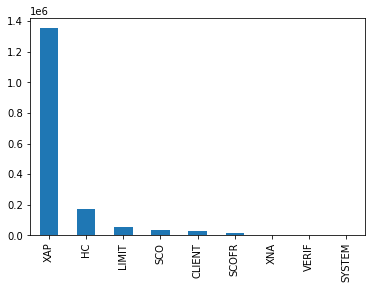

In [ ]:
pa["CODE_REJECT_REASON"].value_counts().plot.bar()

##  Who accompanied client when applying for the previous application

In [ ]:
pa['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied      59.892282
Family             25.095404
Spouse, partner     7.892244
Children            3.714482
Other_B             2.073878
Other_A             1.068122
Group of people     0.263589
Name: NAME_TYPE_SUITE, dtype: float64

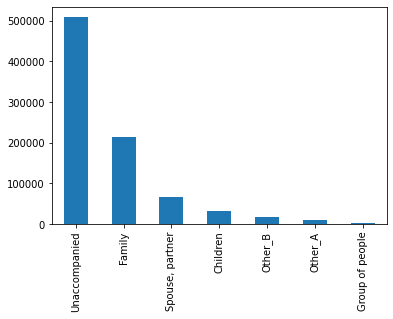

In [ ]:
pa["NAME_TYPE_SUITE"].value_counts().plot.bar()

* **Who accompanied client when applying for the previous application :**
  * Unaccompanied : Approx. 60 % times
  * Family : Approx. 25 % times
  * Spouse, Partner : Approx. 8 %
  * Childrens : Approx. 4 %

##  Was the client old or new client when applying for the previous application

In [ ]:
#code
pa['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100


Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

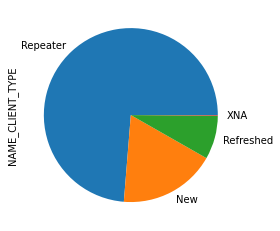

In [ ]:
pa["NAME_CLIENT_TYPE"].value_counts().plot.pie()

* Approximately 74 % was repeater clients who applied for previous application.

##  What kind of goods did the client apply for in the previous application

In [ ]:
#code
pa['NAME_GOODS_CATEGORY'].value_counts(normalize=True)*100


XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0.003832
Animals     

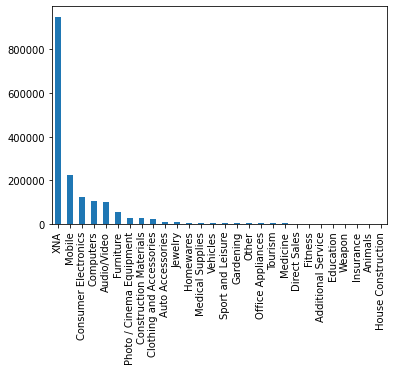

In [ ]:
pa["NAME_GOODS_CATEGORY"].value_counts().plot.bar()

##  Was the previous application for CASH, POS, CAR, …

In [ ]:
#code
pa['NAME_PORTFOLIO'].value_counts(normalize=True)*100


POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

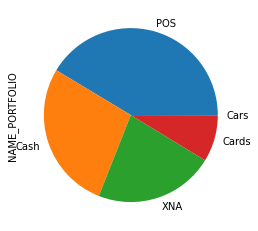

In [ ]:
pa["NAME_PORTFOLIO"].value_counts().plot.pie()

##  Was the previous application x-sell or walk-in ?

In [ ]:
#code
pa['NAME_PRODUCT_TYPE'].value_counts(normalize=True)*100

XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64

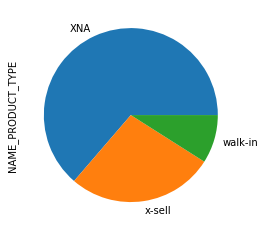

In [ ]:
pa["NAME_PRODUCT_TYPE"].value_counts().plot.pie()

##  Top channels  through which they acquired the client on the previous application

In [ ]:
#code
pa['CHANNEL_TYPE'].value_counts(normalize=True)*100

Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: CHANNEL_TYPE, dtype: float64

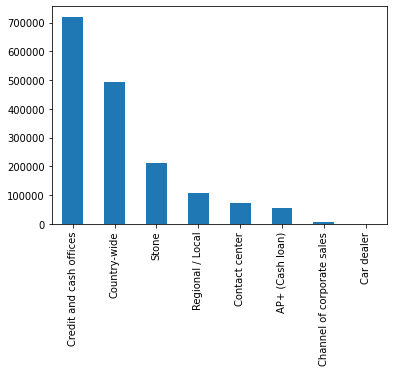

In [ ]:
pa["CHANNEL_TYPE"].value_counts().plot.bar()

* **Top channels  through which they acquired the client on the previous application :**
  * Credidit and cash offices : 43 % times
  * Country_wide : 30 % times
  * Stone : 13 % times

##  Top industry of the seller

In [ ]:
#code
pa['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)*100

XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64

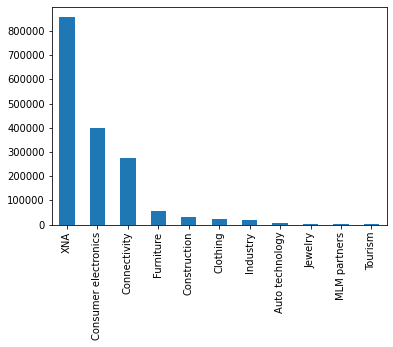

In [ ]:
pa["NAME_SELLER_INDUSTRY"].value_counts().plot.bar()

##  Grouped interest rate into small medium and high of the previous application

In [ ]:
#code

pa['NAME_YIELD_GROUP'].value_counts(normalize=True)*100


XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64

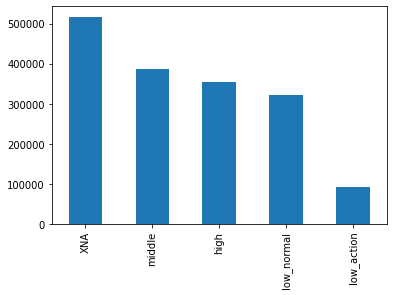

In [ ]:
pa["NAME_YIELD_GROUP"].value_counts().plot.bar()

##  Top Detailed product combination of the previous application

In [ ]:
#code
pa['PRODUCT_COMBINATION'].value_counts(normalize=True)*100

Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: PRODUCT_COMBINATION, dtype: float64

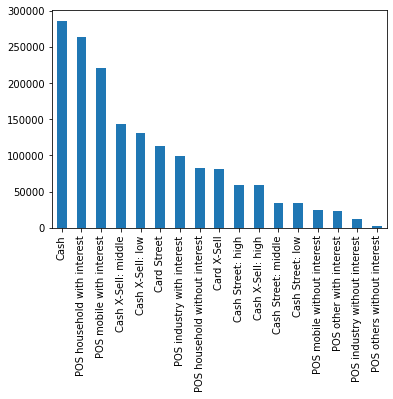

In [ ]:
pa["PRODUCT_COMBINATION"].value_counts().plot.bar()

##  Did the client requested insurance during the previous application

In [ ]:
#code
pa['NFLAG_INSURED_ON_APPROVAL'].value_counts(normalize=True)*100

0.0    66.742984
1.0    33.257016
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

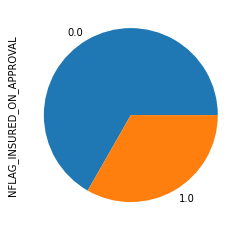

In [ ]:
pa["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie()

# 6. Conclusion: